In [30]:
from problems import IntegerKnapsackPisinger, Knapsack, IntegerKnapsack
from fastqaoa.ctypes.optimize import optimize_qaoa_lbfgs
from fastqaoa.ctypes.qaoa import qaoa
from fastqaoa.ctypes.metrics import Metrics
from fastqaoa.ctypes import Diagonals

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from concurrent.futures import ThreadPoolExecutor

In [31]:
N = 20
instances = IntegerKnapsackPisinger.get_instances()[N]

In [32]:
results = []

# for i in range(16):
def for_instance(x):
    i, j = x
    results = []
    instance = instances[j * 100 + i]
    print(i, j)
    dg = [None, None, None, None]
    
    cost = instance.masked_cost()
    
    costs, weights = instance.diagonalized()
    dg[1] = instance.masked_cost(1)
    dg[2] = instance.masked_cost(-cost.min_val)
    dg[0] = cost.scale_between_sym(N)
    dg[1] = dg[1].scale_between_sym(N)
    dg[2] = dg[2].scale_between_sym(N)
    dg[3] = -costs.to_numpy() + 2 * cost.to_numpy()
    dg[3] = Diagonals.from_numpy(dg[3]).scale_between_sym(N)
    
    for p in (1, 2, 4):
        for hi, h in enumerate(dg):
            res = optimize_qaoa_lbfgs(h, cost, [0.1] * p, [0.1] * p)
            sv = qaoa(h, res.betas, res.gammas)
            
            results.append(Metrics.compute(sv, cost, weights).dump())
            results[-1].update({"diag": hi, "depth": p, "id": i, "type": j})
    instance.decache()
    return results

tpe = ThreadPoolExecutor(max_workers=4)

runs = [(i, j) for i in range(8) for j in range(6)]
for r in tpe.map(for_instance, runs):
    results += r

0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5
6 0
6 1
6 2
6 3
6 4
6 5
7 0
7 1
7 2
7 3
7 4
7 5


In [33]:
df = pd.DataFrame(results)

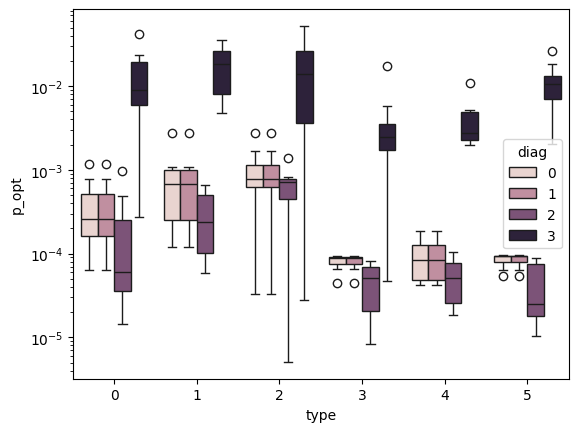

In [41]:
sns.boxplot(df.query("depth == 4"), x="type", y="p_opt", hue="diag")
plt.yscale("log")

In [ ]:
plt.hist(dg3.to_numpy(), bins=100)

In [ ]:
ln(0.01)/ln(1 - 0.0001)

In [5]:
print(instances[0].masked_cost().to_numpy())
print(instances[0].masked_cost(mask_val=1).to_numpy())

0.0
[  0. -11.  -9. ...   0.   0.   0.]
1
[  0. -11.  -9. ...   1.   1.   1.]
